
 Decision Tree Regressor
Best Params: {'reg__max_depth': 7}
MSE: 1062.3323468540948
R²: 0.689575484464308


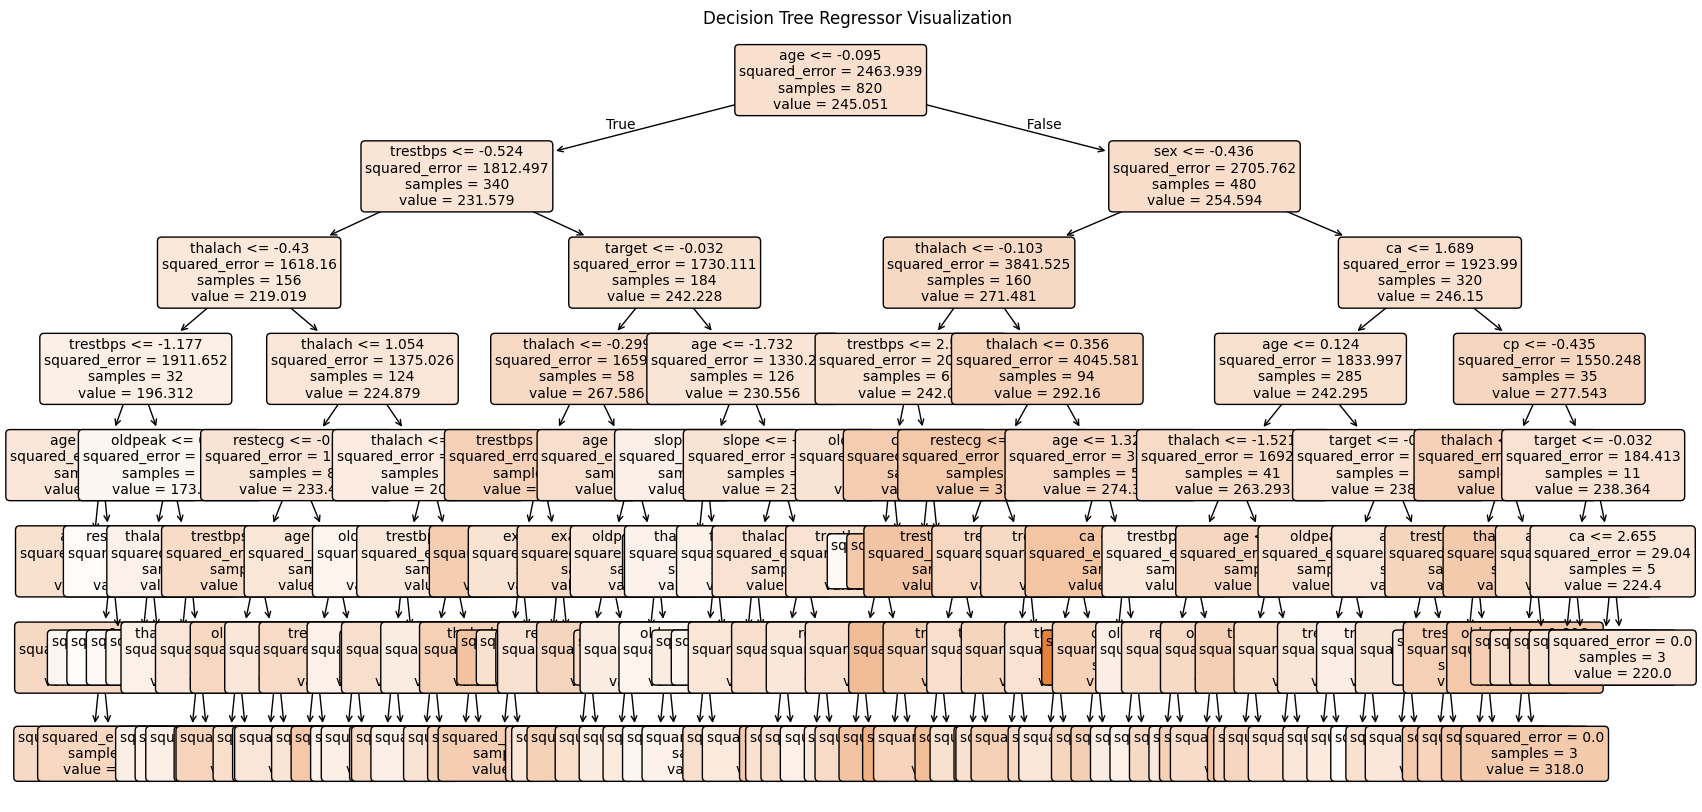


 Random Forest Regressor
Best Params: {'rf__max_depth': None, 'rf__n_estimators': 50}
MSE: 375.51220878048775
R²: 0.8902714429871065


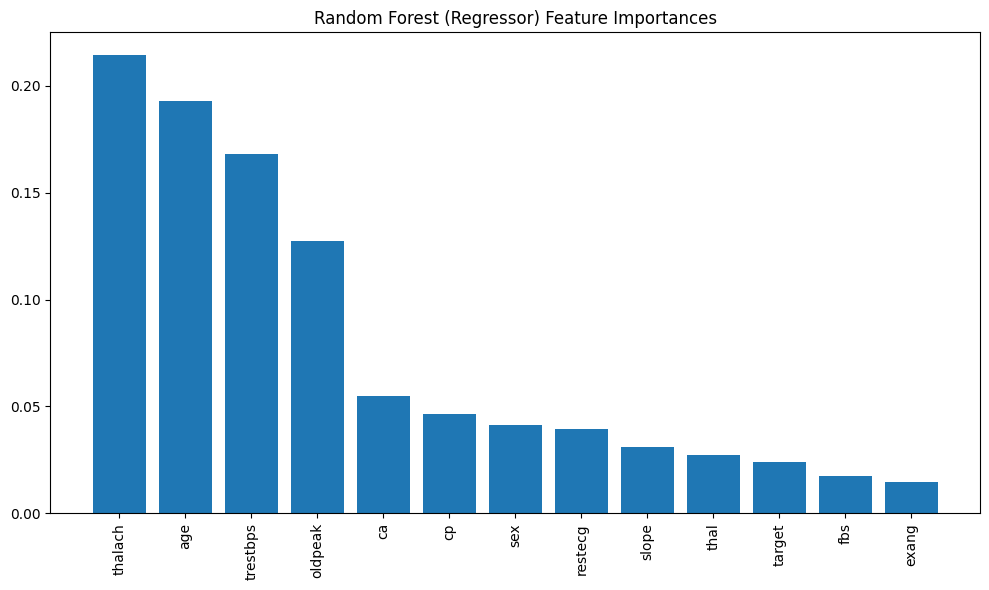

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
df = pd.read_csv("/content/Heart_Disease.csv")
X = df.drop(columns="chol")
y = df["chol"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Decision Tree Regressor
dtr = Pipeline([
    ("scaler", StandardScaler()),
    ("reg", DecisionTreeRegressor(random_state=42))
])
dtr_grid = GridSearchCV(dtr, {"reg__max_depth": [3, 5, 7]}, cv=5)
dtr_grid.fit(X_train, y_train)
y_pred_dt = dtr_grid.predict(X_test)
print("\n Decision Tree Regressor")
print("Best Params:", dtr_grid.best_params_)
print("MSE:", mean_squared_error(y_test, y_pred_dt))
print("R²:", r2_score(y_test, y_pred_dt))
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Extract the best Decision Tree model
best_tree_model = dtr_grid.best_estimator_.named_steps["reg"]

# Plot the tree
plt.figure(figsize=(20, 10))
plot_tree(
    best_tree_model,
    feature_names=X.columns,
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Decision Tree Regressor Visualization")
plt.savefig("decision_tree.png", dpi=300, bbox_inches="tight")  # Save as PNG
plt.show()


# Random Forest Regressor
rfr = Pipeline([
    ("scaler", StandardScaler()),
    ("rf", RandomForestRegressor(random_state=42))
])
rfr_grid = GridSearchCV(rfr, {"rf__n_estimators": [50, 100], "rf__max_depth": [5, None]}, cv=5)
rfr_grid.fit(X_train, y_train)
y_pred_rf = rfr_grid.predict(X_test)
print("\n Random Forest Regressor")
print("Best Params:", rfr_grid.best_params_)
print("MSE:", mean_squared_error(y_test, y_pred_rf))
print("R²:", r2_score(y_test, y_pred_rf))

# Feature Importances
rf_model = rfr_grid.best_estimator_.named_steps["rf"]
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(10, 6))
plt.title("Random Forest (Regressor) Feature Importances")
plt.bar(range(len(importances)), importances[indices])
plt.xticks(range(len(importances)), X.columns[indices], rotation=90)
plt.tight_layout()
plt.show()